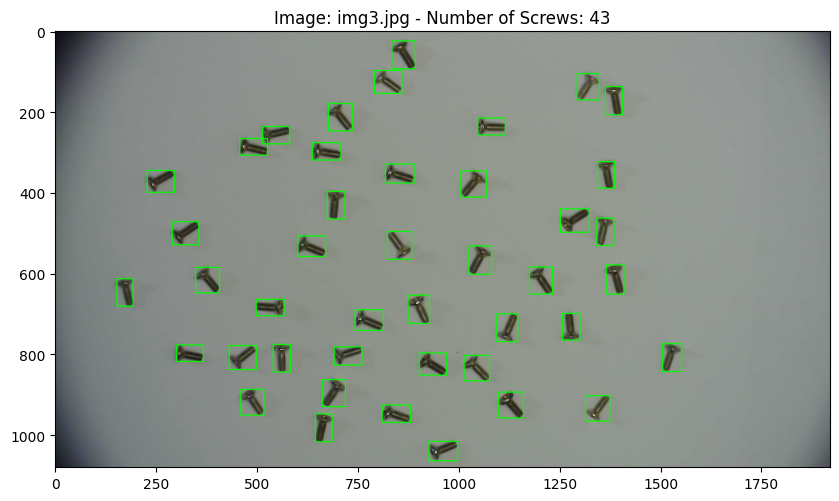

Image: img3.jpg - Counted Screws: 43


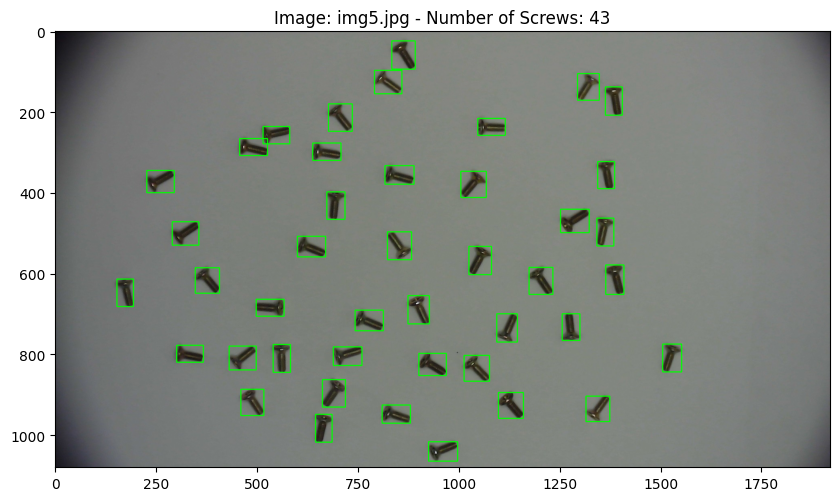

Image: img5.jpg - Counted Screws: 43


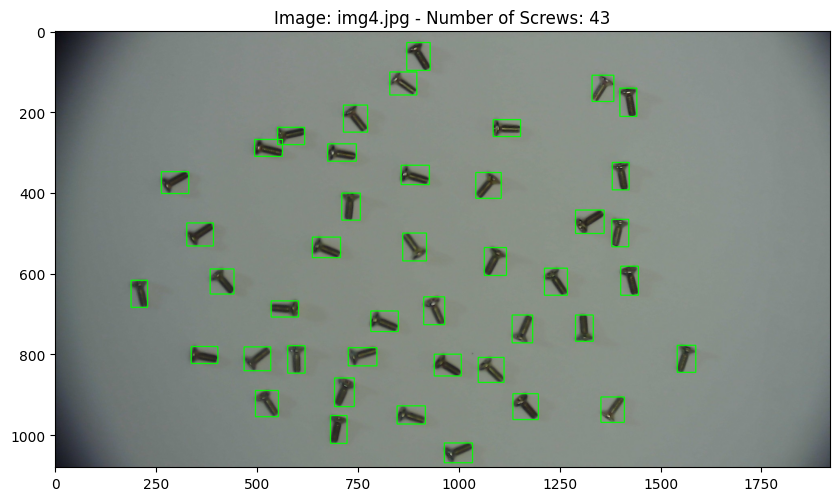

Image: img4.jpg - Counted Screws: 43


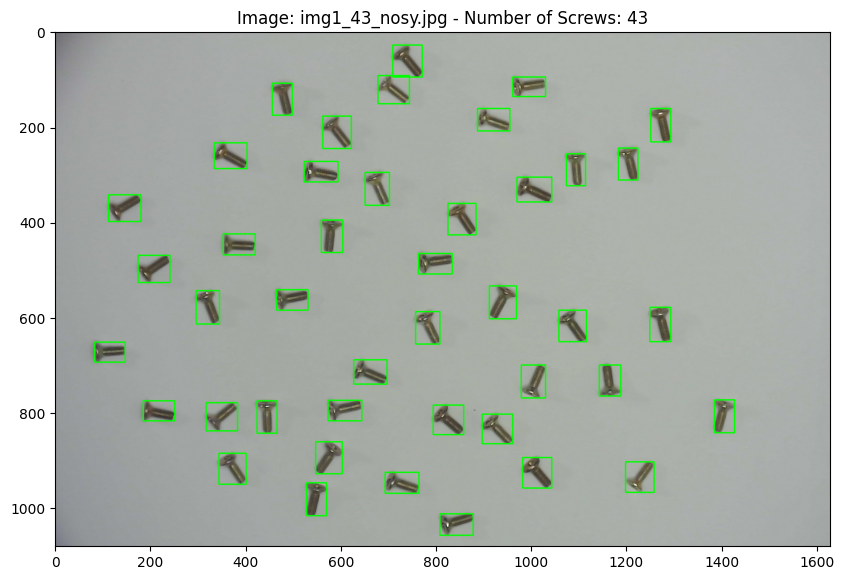

Image: img1_43_nosy.jpg - Counted Screws: 43


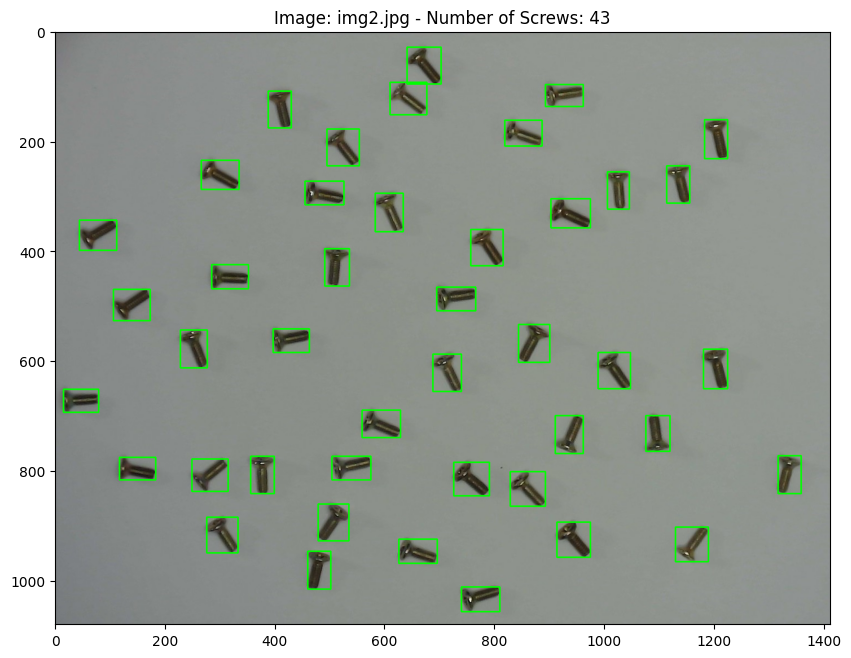

Image: img2.jpg - Counted Screws: 43


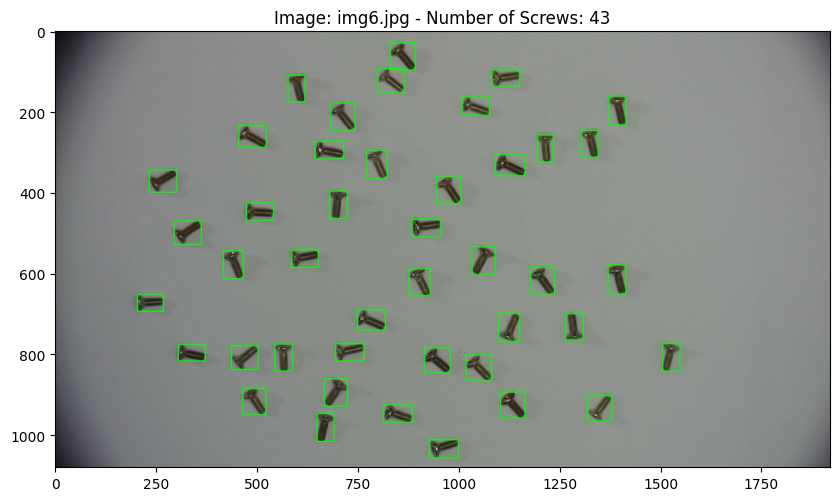

Image: img6.jpg - Counted Screws: 43


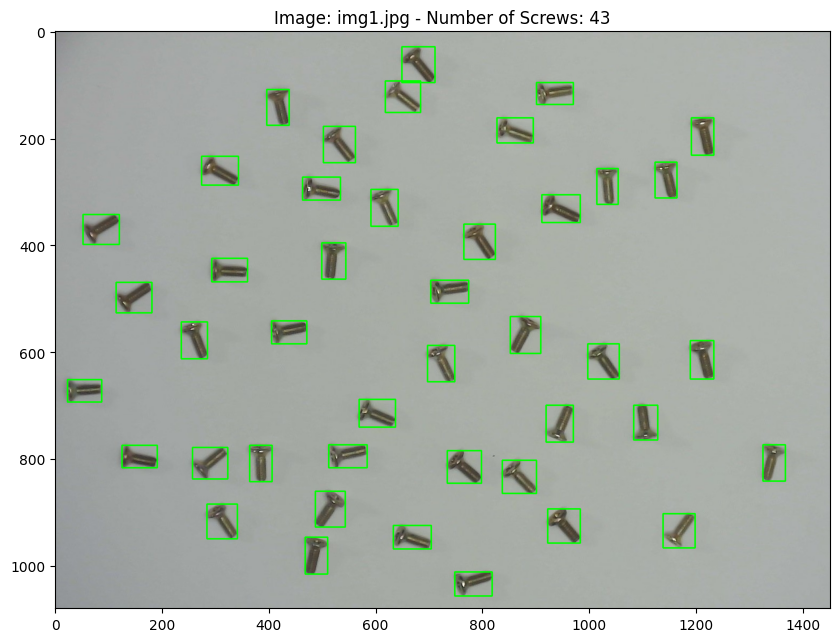

Image: img1.jpg - Counted Screws: 43


In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to the uploaded file
image_dir = '/content/drive/MyDrive/Screws_2024_07_15'

# Function to process an image and return the count of screws
def process_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    # Apply morphological operations
    kernel = np.ones((3, 3), np.uint8)
    morphed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Find contours
    contours, _ = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours and draw bounding boxes
    min_contour_area = 50  # Adjusted minimum contour area for filtering
    count = 0
    for contour in contours:
        if cv2.contourArea(contour) > min_contour_area:
            count += 1
            (x, y, w, h) = cv2.boundingRect(contour)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return count, image

# List of image files
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Process each image and display results
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    count, processed_image = process_image(image_path)

    # Display the results
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Image: {image_file} - Number of Screws: {count}')
    plt.show()

    print(f'Image: {image_file} - Counted Screws: {count}')
